<a href="https://colab.research.google.com/github/shivanswamynathan/NLP/blob/main/NLP_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
with open("students.txt") as f:
  text = f.read()

In [5]:
doc = nlp(text)
doc

Dayton high school, 8th grade students information

Name	birth day   	email
-----	------------	------
Virat   5 June, 1882    virat@kohli.com
Maria	12 April, 2001  maria@sharapova.com
Serena  24 June, 1998   serena@williams.com 
Joe      1 May, 1997    joe@root.com




Tokenization

In [6]:
email = []
for token in doc:
  if token.like_email:
    email.append(token.text)
email

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

In [7]:
tokens = [token.text for token in doc[:10]]
tokens
nlp1 = spacy.blank("en")


In [8]:
from spacy.symbols import ORTH
nlp1.tokenizer.add_special_case("Dayaton" ,[ {ORTH : "Day"},{ORTH:"aton"}])



In [9]:
for sent in doc.sents:
  print(sent)

Dayton high school, 8th grade students information

Name	birth day   	email
-----	------------	------
Virat   5 June, 1882    virat@kohli.com

Maria	12 April, 2001  maria@sharapova.com
Serena  24 June, 1998   serena@williams.com 

Joe      1 May, 1997    joe@root.com






In [10]:
sentence = list(doc.sents)[1]
sentence

Maria	12 April, 2001  maria@sharapova.com
Serena  24 June, 1998   serena@williams.com 

In [11]:
text1='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/,
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

In [12]:
doc1 = nlp(text1)
doc1


Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/,
and the European Social Survey at http://www.europeansocialsurvey.org/.

In [13]:
url = []
for token in doc1:
  if token.like_url:
    url.append(token.text)
url


['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

Figure out all transactions from this text with amount and currency

In [14]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"
doc3 = nlp(transactions)


In [15]:
for token in doc3:
  if token.like_num and doc3[token.i+1].is_currency:
    print(token.text,doc3[token.i+1])

two $
500 €


Lemmatization

In [16]:
for token in doc1[:10]:
  print (token.text,"-->",token.lemma_)



 --> 

Look --> look
for --> for
data --> datum
to --> to
help --> help
you --> you
address --> address
the --> the
question --> question


In [17]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Named Entity Recognition


In [18]:
text2 = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc4 = nlp(text2)

In [19]:
from spacy import displacy
displacy.render(doc4,style="ent")

In [20]:
gpe = []
for ent in doc4.ents:
  if ent.label_ == 'GPE':
    gpe.append(ent)
gpe

[India, Delhi, Gujarat, Tamilnadu, Pongal, Andhrapradesh, Assam, Bihar]

In [21]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)

In [22]:
displacy.render(doc,style="ent")

In [23]:
date = []
for ent in doc.ents:
  if ent.label_ == 'DATE':
    date.append(ent)
date


[24 April 1973, 5 November 1988, 7 July 1981, 19 December 1974]

Bag Of Words (BOW)

In [45]:
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


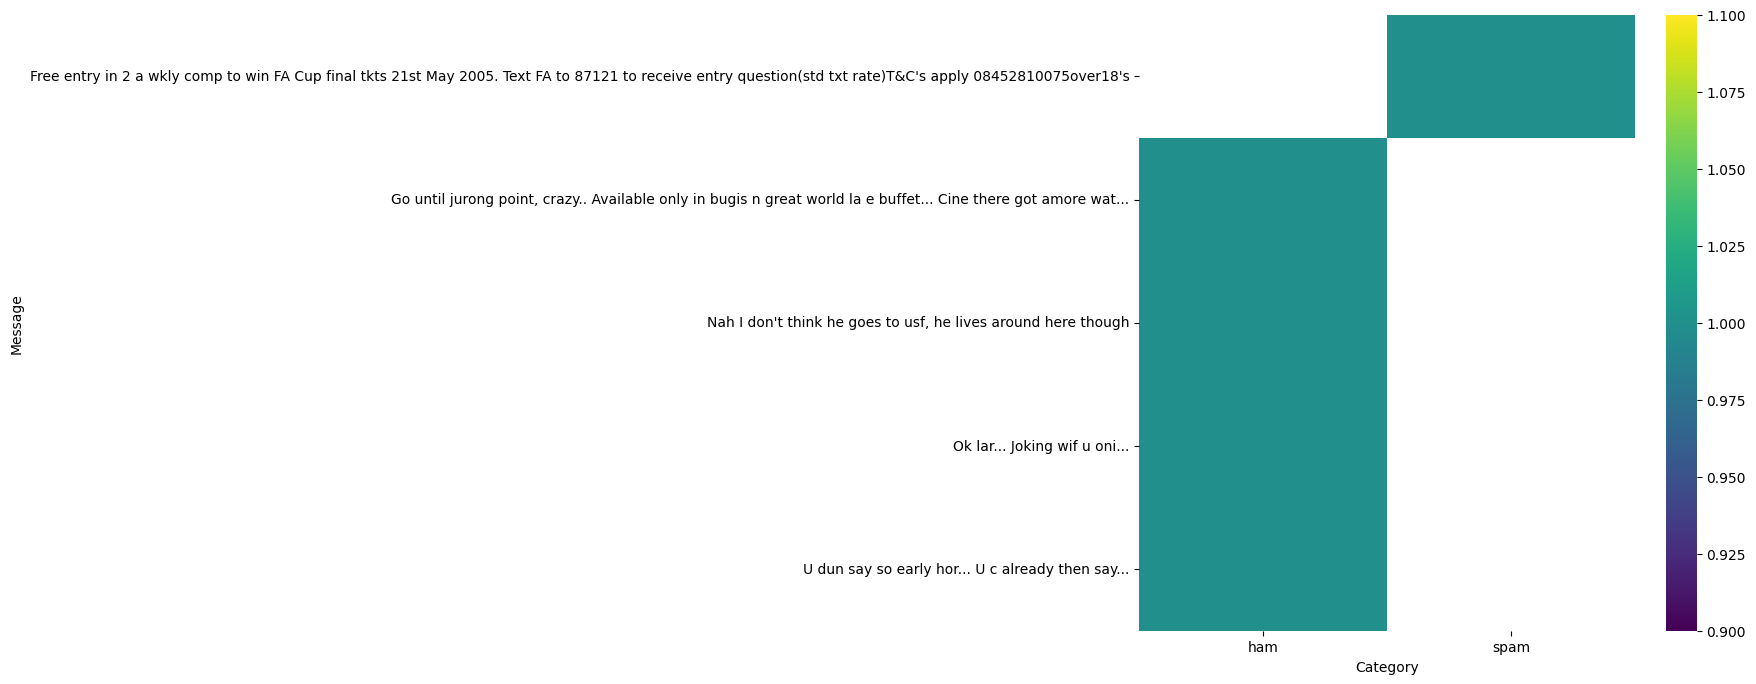

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_2.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [47]:
data.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Access the 'Category' column with uppercase 'C' for transformation
data['category'] = le.fit_transform(data['Category'])
data.head()

,Category,Message,category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [55]:
X = data.iloc[:,-2]
y = data.iloc[:,-1]


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 59275 stored elements in Compressed Sparse Row format>

In [61]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [67]:
from sklearn.metrics import classification_report
y_pre = model.predict(v.transform(X_test))
report_str = classification_report(y_test, y_pre)

# Split the report into lines
report_lines = report_str.split('\n')
report_lines

['              precision    recall  f1-score   support',
 '',
 '           0       0.99      1.00      1.00       966',
 '           1       1.00      0.94      0.97       149',
 '',
 '    accuracy                           0.99      1115',
 '   macro avg       1.00      0.97      0.98      1115',
 'weighted avg       0.99      0.99      0.99      1115',
 '']

In [71]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'fldc.vk d.kdsjf k vfdsk.fdksd.lds l.ksd. zxkl lsd/ /xcl/ c;'
]
emailcv = v.transform(emails)
model.predict( emailcv )

array([0, 1, 0])

In [72]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [73]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [75]:
classification_report(y_test,clf.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00       966\n           1       1.00      0.94      0.97       149\n\n    accuracy                           0.99      1115\n   macro avg       1.00      0.97      0.98      1115\nweighted avg       0.99      0.99      0.99      1115\n'